# Avinash Pandey 
Msc DataScience 



#exploratry data analysis on ADANIPORTS  datasets


TODO- To talk about the dataset and EDA
      source-kaggle.
      
 
Information about adaniports stock data 
why nifty 50 and its stocks?
Nifty 50 shows the economic condition of india .it consist of 50 companies in which I choose adaniports to perform 
expolatory data analysis 

In [1]:
#importing libraries
import pandas as pd
from sklearn import metrics 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import time 
import os 
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data_file="/home/avinash/Music/NIFTY50_STOCKS/ADANIPORTS.csv"

Data preparation and cleaning
1. Loading file using pandas
2. We will see some info about data
3. If there any incorrect value or missing value will fix that

In [3]:
#reading the data into dataframes
df= pd.read_csv(data_file)


In [4]:
#removing Series column 
df.drop('Series',axis=1,inplace=True)

In [5]:
df.drop('Symbol',axis=1,inplace=True)

In [6]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [7]:
df.isna().any()

Date                  False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume    False
%Deliverble           False
dtype: bool

<AxesSubplot:>

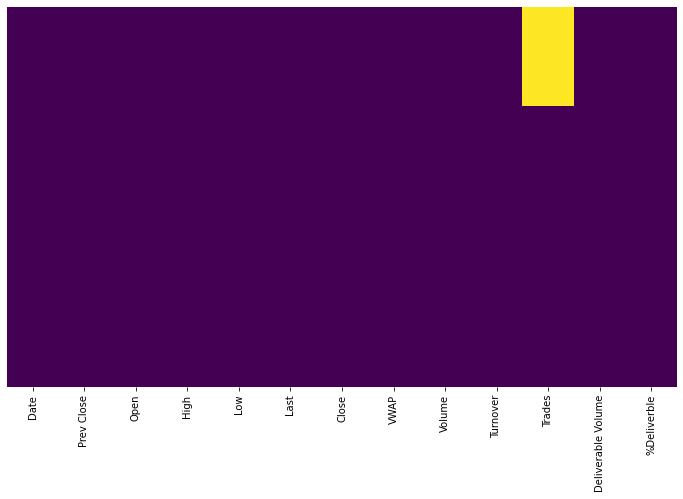

In [8]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [9]:
#columns on which we are working in
df.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [10]:
df.shape

(3322, 13)

In [11]:
#some more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Prev Close          3322 non-null   float64
 2   Open                3322 non-null   float64
 3   High                3322 non-null   float64
 4   Low                 3322 non-null   float64
 5   Last                3322 non-null   float64
 6   Close               3322 non-null   float64
 7   VWAP                3322 non-null   float64
 8   Volume              3322 non-null   int64  
 9   Turnover            3322 non-null   float64
 10  Trades              2456 non-null   float64
 11  Deliverable Volume  3322 non-null   int64  
 12  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 337.5+ KB


In [12]:
#through this command we can see the mean, max, min and other details
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [13]:
numerical_datatype=['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerical_datatype)
len(numeric_df.columns)

12

Percentage of missing values in data


In [14]:
#searching for missing value in percentage
missing_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentage

Trades                0.260686
Date                  0.000000
Prev Close            0.000000
Open                  0.000000
High                  0.000000
Low                   0.000000
Last                  0.000000
Close                 0.000000
VWAP                  0.000000
Volume                0.000000
Turnover              0.000000
Deliverable Volume    0.000000
%Deliverble           0.000000
dtype: float64

Text(0.5, 1.0, 'Missing_value percentage')

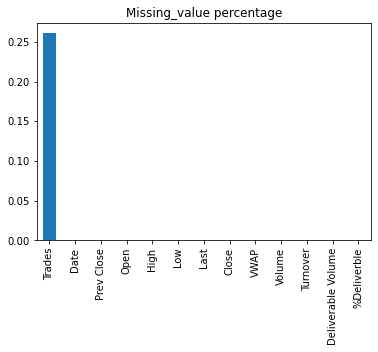

In [15]:
#missing value percentage using barchart
missing_percentage.plot(kind='bar')
plt.title("Missing_value percentage")

EXPLORATRY ANALYSIS AND VISUALIZATION

Columns which are going to be analyzed:
1. Volume
2. Trades
3. Turnover
4. Date for analysing over year analysis
5. High and Low


In [16]:
df.columns

Index(['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

#Volume

In [17]:
#importing seaborn libaray for better visualization of data
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:xlabel='Volume', ylabel='Count'>

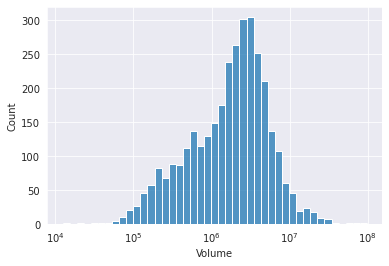

In [18]:
#volume column histogram represents most of the volume of comapny is between 10^5 to 10^7
sns.histplot(df.Volume, log_scale=True)

In [19]:
volumes=df.Volume.value_counts()
len(volumes)

3322

In [20]:
#checking for higher volumes and lower volumes that company got
high_volume=df.Volume[df.Volume>=5000000]
low_volume=df.Volume[df.Volume<500000]

In [21]:
len(high_volume)/len(volumes)

0.14388922335942203

In [22]:
len(low_volume)/len(volumes)

0.17248645394340759

#Trades

In [23]:
df.Trades.fillna(0).astype(int)

0            0
1            0
2            0
3            0
4            0
         ...  
3317    116457
3318    236896
3319    130847
3320    153293
3321    132141
Name: Trades, Length: 3322, dtype: int64

<AxesSubplot:xlabel='Trades', ylabel='Count'>

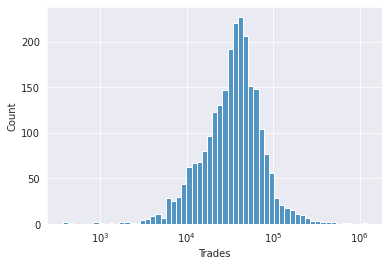

In [24]:
#Trades column histogram represents most of the trades of comapny is between 10^4 to 10^5
sns.histplot(df.Trades, log_scale=True)


In [25]:
Trades_count=df.Trades.value_counts()
len(Trades_count)

2417

In [26]:
high_trades=df.Trades[df.Trades>=70000]
low_trades=df.Trades[df.Trades<10000]

In [27]:
len(high_trades)/len(Trades_count)

0.13570541994207697

In [28]:
len(low_trades)/len(Trades_count)

0.07447248655357881

#TURNOVER

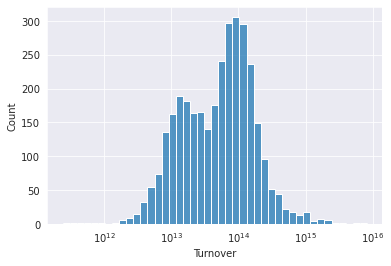

In [29]:
#visualization of turnover of the company
sns.histplot(df.Turnover, log_scale=True)
sns.set(rc={"figure.figsize": (15, 8)})

In [30]:
highest_turnover=df.Trades.max()
highest_turnover

1205984.0

In [31]:
lowest_turnover=df.Trades.min()
lowest_turnover

366.0

#DATE

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekdays'] = df['Date'].dt.dayofweek
df['Months'] = df['Date'].dt.strftime('%b')

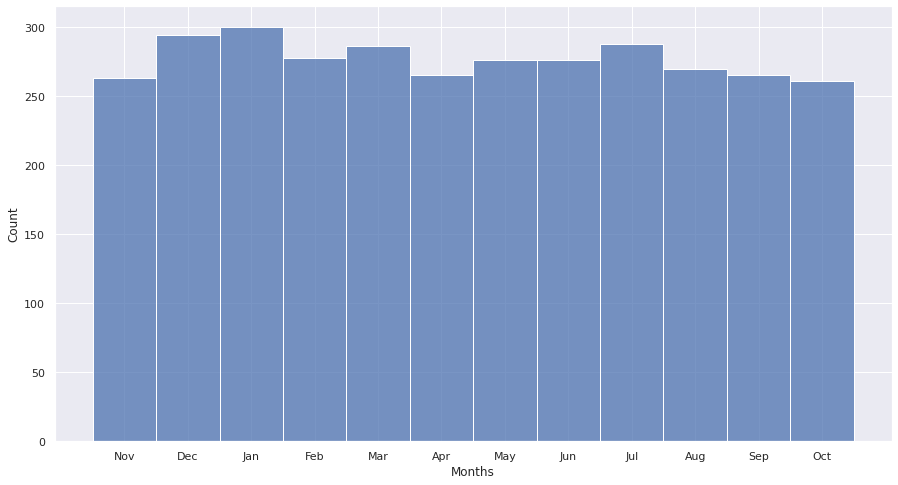

In [33]:
sns.histplot(df.Months, bins=12, kde=False)
sns.set(rc={"figure.figsize": (15, 8)})

<AxesSubplot:xlabel='Year', ylabel='Volume'>

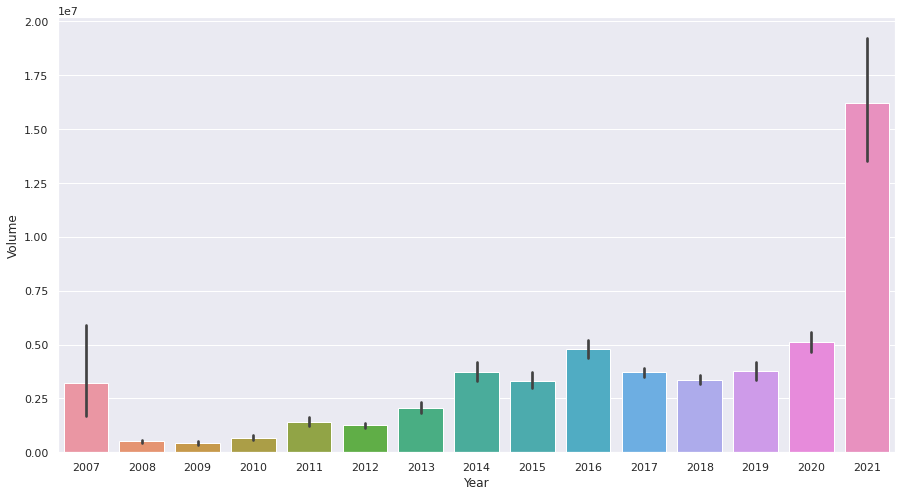

In [34]:
#volumes vs years chart

sns.barplot(x=df.Year,y=df.Volume)


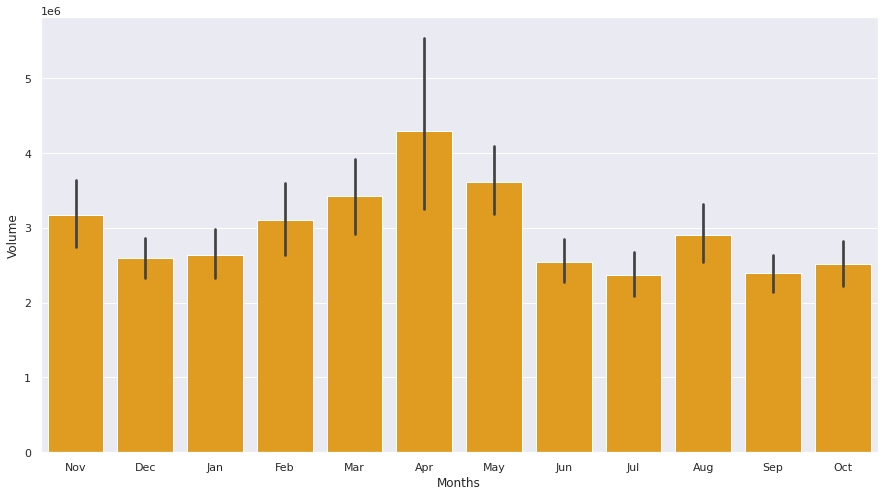

In [35]:
#volumes vs months chart
sns.barplot(x=df.Months,y=df.Volume,color='orange')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Trades'>

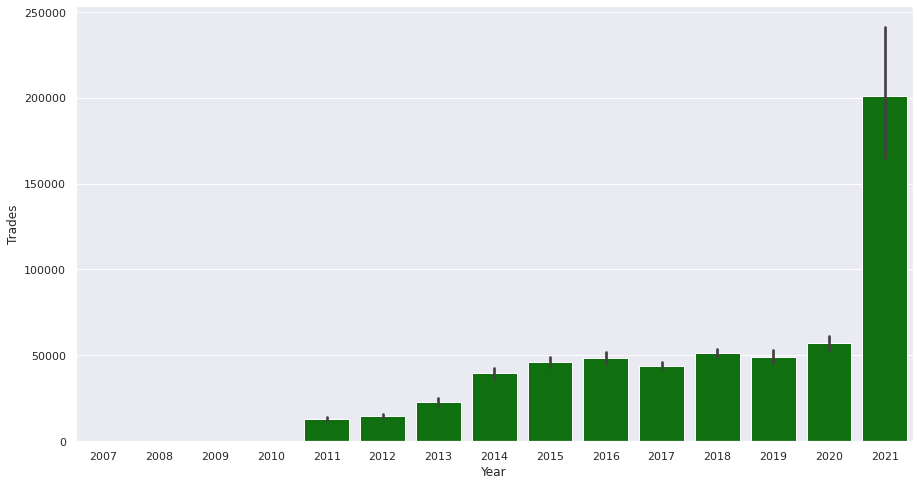

In [36]:
#Trades vs years chart
sns.barplot(x=df.Year,y=df.Trades,color='green')


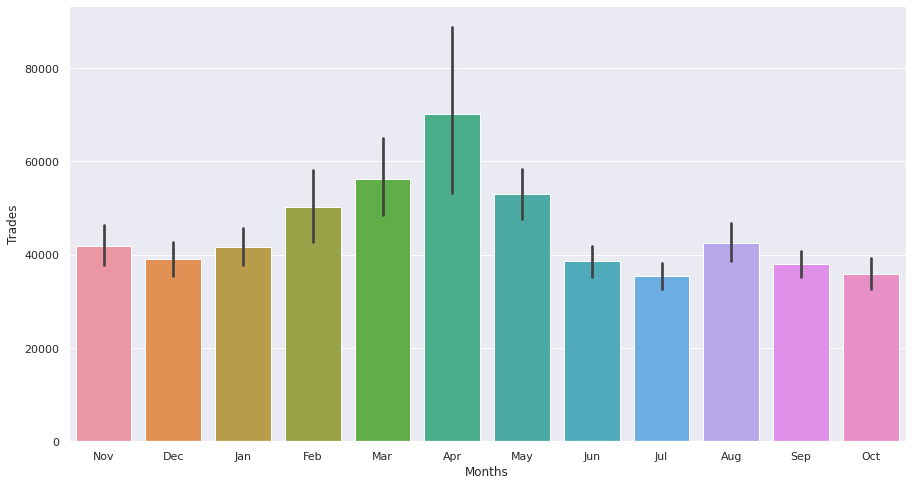

In [37]:
#Trades vs months chart
sns.barplot(x=df.Months,y=df.Trades)
plt.show()

<AxesSubplot:xlabel='Weekdays', ylabel='Trades'>

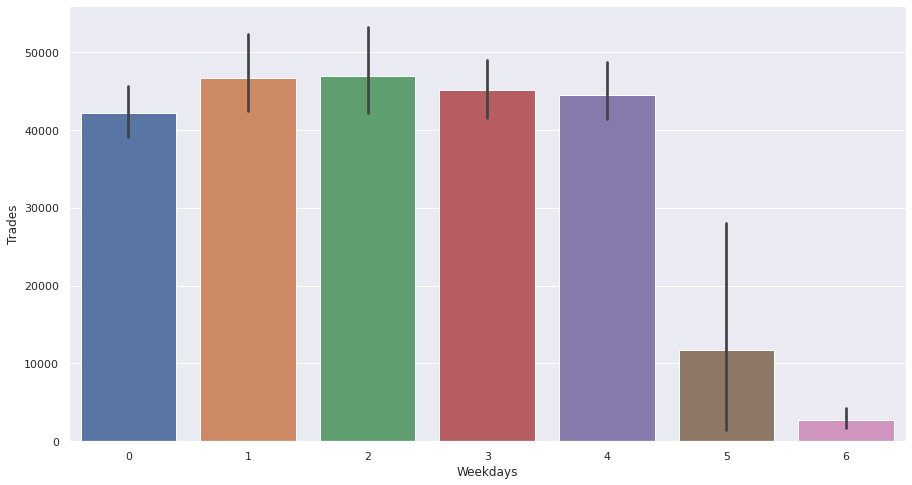

In [38]:
#Trades vs weekdays chart
sns.barplot(x=df.Weekdays,y=df.Trades)

<AxesSubplot:xlabel='Year', ylabel='High'>

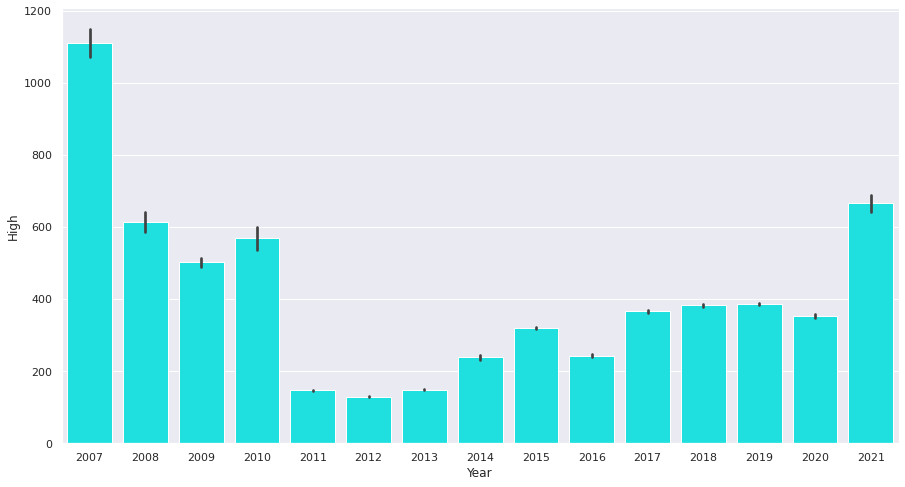

In [39]:
#highest opening price of day over year analysis
sns.barplot(x=df.Year,y=df.High,color='cyan')

<AxesSubplot:xlabel='Year', ylabel='Low'>

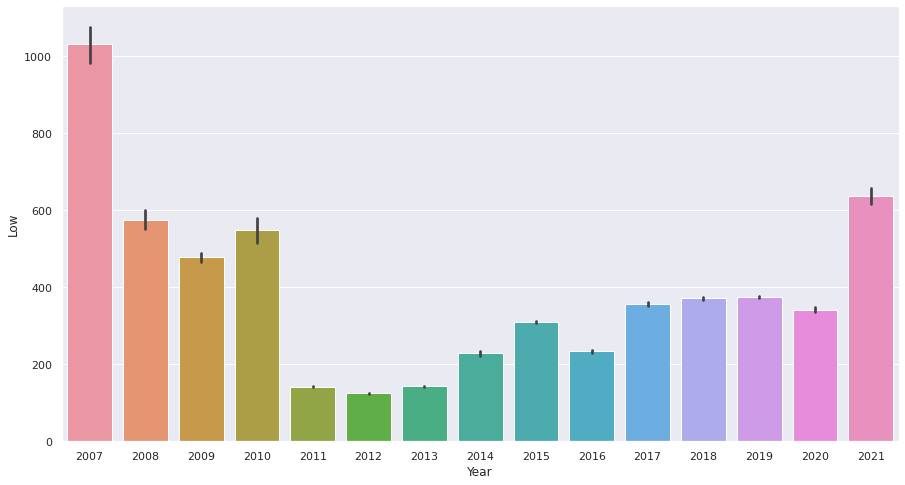

In [40]:
#lowest opening price of day over year analysis
sns.barplot(x=df.Year,y=df.Low)

Questions that came during analysis

1. which is the most trading day?
2. which month we had seen trading all time high?
3. what is the trend of trading year over year?
2. what is the highest and lowest turnover?
3. highest and lowest volume days?


SUMMARY AND CONCLUSION

Insights:

*   The days when volume was greater than 50,00,000 on basis of everdays volume is 14.39%.
*   The days when volume was less than 5,00,000 on basis of everdays volume is 17.24%.
*   The days when No. of trades was greater than 70,000 on basis of everdays is 13.57%.
*   The days when No. of trades was less than 10,000 on basis of everdays is 7.44%.
*   Usually after analysis we can say most trading days are from monday to friday. There is usually less or no to trading on saturdays and sundays.
*   We have seen the most trading month after the analysis is month of APRIL.
*   Talking about the trend of trading on basis of years, we can say that it has only increasd and for till now with analysis we can say that 2021 year is the most trading year.
*   Highest turnover of the company = 1205984.0
*   Lowest turnover of the company = 366.0
*  Talking about volume, then in 2007 company have bigger volume and then it decreased and then it is started increasing from 2012 from then it has increased.
*   April month is the most happening month for volumes of the company.













Great! Our data is ready for our model!

# Building a Linear Regression model

## Train Test Split

In [41]:
df.drop(['Trades','Turnover','Month','Year'],axis=1,inplace=True)

In [42]:
df.drop(['Months','Weekdays','%Deliverble','Deliverable Volume','Last'],axis=1,inplace=True)

In [43]:
df.drop(['VWAP','Prev Close'],axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3322 non-null   datetime64[ns]
 1   Open    3322 non-null   float64       
 2   High    3322 non-null   float64       
 3   Low     3322 non-null   float64       
 4   Close   3322 non-null   float64       
 5   Volume  3322 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 155.8 KB


In [45]:
df=pd.read_csv(data_file)

In [46]:
df.drop(['Symbol','Last','Series','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble','Prev Close'],axis=1,inplace=True)

In [47]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2007-11-27,770.00,1050.00,770.0,962.90,27294366
1,2007-11-28,984.00,990.00,874.0,893.90,4581338
2,2007-11-29,909.00,914.75,841.0,884.20,5124121
3,2007-11-30,890.00,958.00,890.0,921.55,4609762
4,2007-12-03,939.75,995.00,922.0,969.30,2977470


In [48]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [49]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [51]:
X_train.shape

(2657, 4)

In [52]:
X_test.shape

(665, 4)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [54]:
regressor.fit(X_train,y_train)

LinearRegression()

In [55]:
print(regressor.coef_)

[-5.03504216e-01  7.45694571e-01  7.54248078e-01  1.33918894e-07]


In [56]:
print(regressor.intercept_)

0.6015961292258112


In [57]:
predicted=regressor.predict(X_test)

In [58]:
print(X_test)

        Open    High     Low   Volume
1182  117.50  117.50  114.20   373291
1396  150.05  153.90  149.50  1328772
1773  348.00  349.45  340.90  2928237
2057  236.45  243.20  235.75  4606790
2520  428.00  435.50  424.50  2734628
...      ...     ...     ...      ...
2144  226.00  229.45  223.55  3648076
2952  390.00  394.40  388.50  2277683
2430  407.00  414.70  406.00  4319190
710   167.25  169.80  160.60  2388253
1110  112.00  112.05  109.80  1245523

[665 rows x 4 columns]


In [59]:
predicted.shape

(665,)

In [71]:
dframe=pd.DataFrame(y_test,predicted)

In [72]:
dfr=pd.DataFrame({'Actual price':y_test,'Predicted price':predicted})

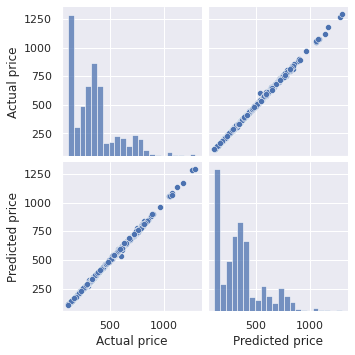

In [106]:

sns.set(rc={"figure.figsize":(20, 15)})
sns.pairplot(dfr)

In [101]:
dfr.head(15)

,Actual price,Predicted price
1182,116.60,115.244084
1396,151.85,152.751218
1773,345.15,343.480413
2057,241.95,241.331865
2520,428.85,430.396305
1359,154.65,156.180419
118,884.40,885.733238
3029,358.40,358.686278
3063,270.50,268.184707
751,151.45,152.104199


In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [77]:
regressor.score(X_test,y_test)

0.9994329817619355

In [78]:
import math 

In [79]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 2.773319927554851


In [80]:
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))

Mean Square Error: 24.794217985230674


In [81]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 4.979379277101783


In [102]:
graph=dfr.head(15)

Text(0.5, 1.0, 'Actual vs predicted')

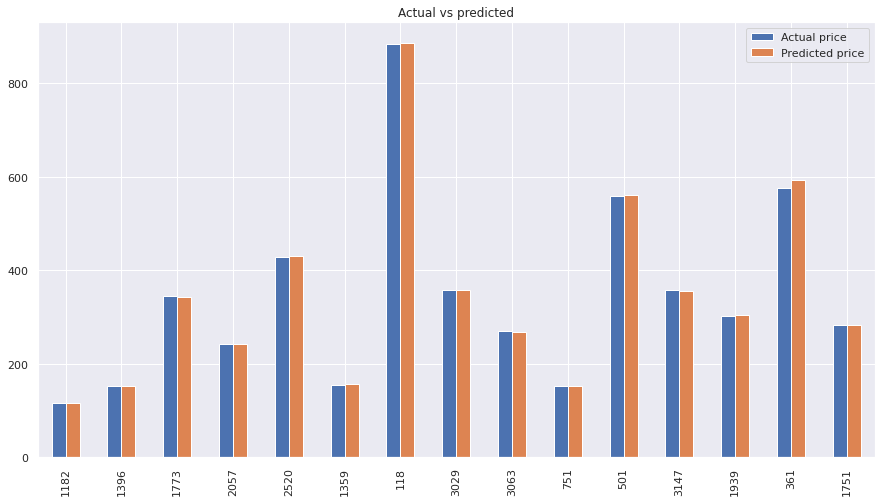

In [103]:
graph.plot(kind='bar')
plt.title('Actual vs predicted')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
df.head()